In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting parameters
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (16, 8)

# Question to answer: 

### What topics are grads continuing to reference after graduation and into their jobs (for each program)?

Pulling in data and cleaning/preparing it slightly 

In [2]:
df = pd.read_csv('logs_data.csv', index_col=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 48.1+ MB


In [4]:
cohorts = pd.read_csv('cohorts_data.csv')
cohorts = cohorts.drop(columns = ['Unnamed: 0', 'slack', 'created_at', 'updated_at', 'deleted_at'])
combined_df = pd.merge(df, cohorts, how = 'outer', left_on = 'cohort_id', right_on= 'id')

In [5]:
combined_df

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,program_id
0,0.0,2018-01-26,09:55:03,/,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
1,1.0,2018-01-26,09:56:02,java-ii,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
2,2.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
3,3.0,2018-01-26,09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
4,58.0,2018-01-26,10:40:15,javascript-i/functions,1.0,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Balboa,2015-11-03,2016-03-11,4.0
900225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,Redwood,2017-07-31,2017-12-06,2.0
900226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,Ada,2019-02-04,2019-06-16,3.0
900227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,Io,2020-07-20,2021-01-21,2.0


In [38]:
# Getting ride of the rows with no date

combined_df = combined_df[combined_df.date.notna()]

In [39]:
def make_datetime_index(df):
    df['datetime'] = pd.to_datetime(df.date + ' ' + df.time)
    df = df.set_index('datetime').sort_index()
    df = df.drop(columns= ['Unnamed: 0', 'date', 'time', 'id'])
    return df

In [40]:
df = make_datetime_index(combined_df)

In [41]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:55:03,/,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2.0,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900222 non-null  object 
 1   user_id     900223 non-null  float64
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   name        847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   program_id  847330 non-null  float64
dtypes: float64(3), object(5)
memory usage: 61.8+ MB


In [43]:
# Converting the other two date columns to datetime columns
df['start_date'] = pd.to_datetime(df.start_date)
df['end_date'] = pd.to_datetime(df.end_date)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  float64       
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   program_id  847330 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 61.8+ MB


#### Investigating the nulls in cohort_id to see if there is a noticable pattern.

In [45]:
no_cohort = df[df.cohort_id.isna()]
no_cohort = no_cohort.dropna(axis=0, subset=['ip'])

In [46]:
no_cohort.index.min(), no_cohort.index.max()

(Timestamp('2018-01-26 16:46:16'), Timestamp('2021-04-21 12:56:26'))

Comparing to the df datetime min and max

In [47]:
df.index.min(), df.index.max()

(Timestamp('2018-01-26 09:55:03'), Timestamp('2021-04-21 16:44:39'))

No difference, looking at the distribution of times for no_cohort access

<AxesSubplot:xlabel='datetime', ylabel='Count'>

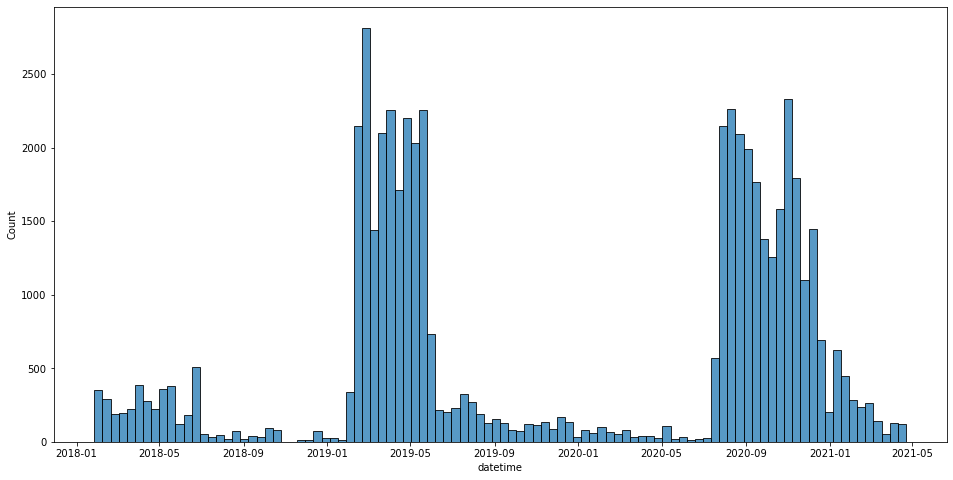

In [48]:
sns.histplot(data=no_cohort.index, bins = 100)

comparing to overall dataframe histplot

<AxesSubplot:xlabel='datetime', ylabel='Count'>

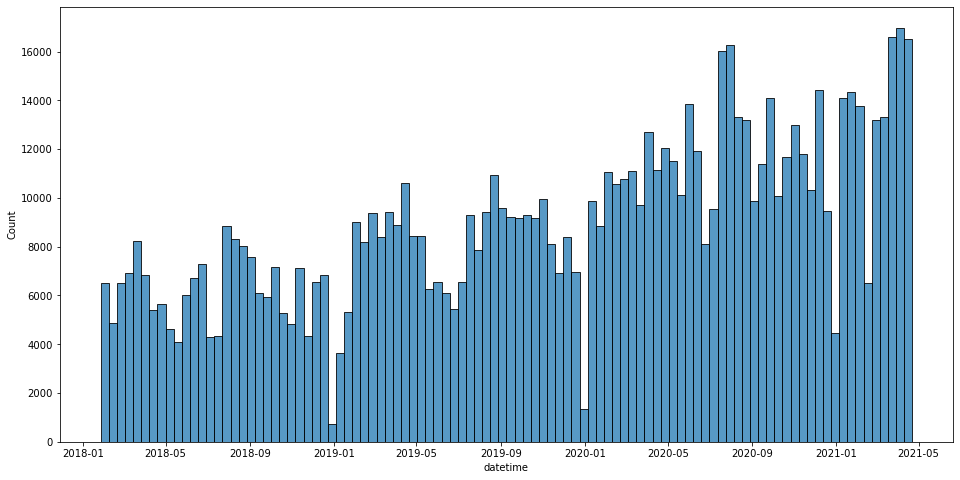

In [49]:
sns.histplot(data=df.index, bins =100)

Shows variation in the access times between no_cohort and df

In [50]:
no_cohort.user_id.value_counts()

354.0    2965
736.0    2358
363.0    2248
716.0    2136
368.0    2085
         ... 
644.0       6
663.0       4
62.0        4
176.0       3
89.0        3
Name: user_id, Length: 78, dtype: int64

Therea are 78 users who have no cohort.

In [51]:
no_cohort.path.value_counts().head(25)

/                                                                            4459
search/search_index.json                                                     1985
javascript-i                                                                  780
toc                                                                           706
spring                                                                        641
java-iii                                                                      567
html-css                                                                      508
java-ii                                                                       508
jquery                                                                        484
javascript-ii                                                                 436
mysql                                                                         422
java-i                                                                        398
Intro_to_Regress

In [52]:
df.name.sort_values().unique()

array(['Andromeda', 'Apex', 'Apollo', 'Arches', 'Badlands', 'Bash',
       'Bayes', 'Betelgeuse', 'Ceres', 'Curie', 'Darden', 'Deimos',
       'Denali', 'Easley', 'Europa', 'Everglades', 'Florence', 'Fortuna',
       'Franklin', 'Ganymede', 'Glacier', 'Hampton', 'Hyperion', 'Ike',
       'Joshua', 'Jupiter', 'Kalypso', 'Kings', 'Lassen', 'Luna',
       'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon', 'Olympic',
       'Pinnacles', 'Quincy', 'Sequoia', 'Staff', 'Teddy', 'Ulysses',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Yosemite', 'Zion', nan],
      dtype=object)

### Exploring other various data before jumping back to my question.

In [53]:
df.program_id.unique()

array([ 1.,  2., nan,  4.,  3.])

In [54]:
df[(df.name == "Ada") | (df.name == 'Bayes')].program_id.unique()

array([3.])

Program id 3 corresponds to Data Science.

In [55]:
df[df.program_id == 3].name.unique()

array(['Bayes', 'Curie', 'Darden', 'Easley', 'Florence'], dtype=object)

Confirmed, according to alumni.codeup.comm these are all DS program students

In [56]:
df[(df.name == "Arches") | (df.name == 'Badlands')].program_id.unique()

array([1.])

Program id 1 corresponds to WebDev

In [57]:
df[df.program_id == 1].name.sort_values().unique()

array(['Arches', 'Badlands', 'Denali', 'Everglades', 'Franklin',
       'Glacier', 'Hampton', 'Ike', 'Joshua', 'Kings', 'Lassen',
       'Olympic', 'Quincy'], dtype=object)

Confirmed, according to alumni.codeup.com these are all WebDev program students

In [58]:
df[df.program_id == 2].name.sort_values().unique()

array(['Andromeda', 'Apex', 'Bash', 'Betelgeuse', 'Ceres', 'Deimos',
       'Europa', 'Fortuna', 'Ganymede', 'Hyperion', 'Jupiter', 'Kalypso',
       'Luna', 'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon',
       'Pinnacles', 'Sequoia', 'Staff', 'Teddy', 'Ulysses', 'Voyageurs',
       'Wrangell', 'Xanadu', 'Yosemite', 'Zion'], dtype=object)

Program 2 corresponds to WebDev program students as confirmed by alumni.codeup.com

In [59]:
df[df.program_id == 4].name.sort_values().unique()

array(['Apollo'], dtype=object)

Program 4 corresponds to WebDev program students as confirmed by alumni.codeup.com

Program id corresponds as follows:
- 1, 2, 4 are all WebDev students
- 3 is Data Scientist students

Based on this information I'm going to split the WebDev students and DS students to see if there is any difference when answering my question.

In [60]:
ds = df[df.program_id == 3]

In [61]:
ds.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-08-20 09:39:58,/,466.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:39:59,/,468.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:39:59,/,467.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:40:02,/,469.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:40:08,/,470.0,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0


In [62]:
webdev = df[df.program_id != 3]

In [63]:
webdev.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:55:03,/,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2.0,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


# Back to my main question:
### What topics are grads continuing to reference after graduation and into their jobs (for each program)?

Before I do anything I need to remove staff from my exploration as my question specifically pertains to grads.

In [97]:
ds = ds[ds.name != 'Staff']

In [98]:
webdev = webdev[webdev.name != 'Staff']

First I need to explore if these logs refer to access to the curriculum AFTER the graduation date only or for ALL time (even when they were students)

In [94]:
for cohort in df.name.unique():
    print(f"The {cohort} cohort ended on {df[df.name == cohort].end_date.min()} "
          f"and the earliest recorded access was on {df[df.name == cohort].index.min()}\n")

The Hampton cohort ended on 2016-02-06 00:00:00 and the earliest recorded access was on 2018-01-26 09:55:03

The Teddy cohort ended on 2018-05-17 00:00:00 and the earliest recorded access was on 2018-01-26 09:56:24

The Sequoia cohort ended on 2018-02-15 00:00:00 and the earliest recorded access was on 2018-01-26 10:08:22

The Arches cohort ended on 2014-04-22 00:00:00 and the earliest recorded access was on 2018-01-26 10:14:47

The Niagara cohort ended on 2017-03-09 00:00:00 and the earliest recorded access was on 2018-01-26 10:59:02

The Pinnacles cohort ended on 2017-07-20 00:00:00 and the earliest recorded access was on 2018-01-26 11:36:27

The Quincy cohort ended on 2017-09-22 00:00:00 and the earliest recorded access was on 2018-01-26 12:37:53

The nan cohort ended on NaT and the earliest recorded access was on NaT

The Kings cohort ended on 2016-09-15 00:00:00 and the earliest recorded access was on 2018-01-26 21:42:26

The Lassen cohort ended on 2016-11-10 00:00:00 and the earl

This information shows that there is a good portion of the data that occurs PRIOR to students graduation so I need to clean this up and only have logs that show data from after. I will reset this and proceed to analyze.

In [99]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103412 entries, 2019-08-20 09:39:58 to 2021-04-21 16:32:50
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        103411 non-null  object        
 1   user_id     103412 non-null  float64       
 2   cohort_id   103412 non-null  float64       
 3   ip          103412 non-null  object        
 4   name        103412 non-null  object        
 5   start_date  103412 non-null  datetime64[ns]
 6   end_date    103412 non-null  datetime64[ns]
 7   program_id  103412 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 7.1+ MB


In [100]:
ds_after_grad = ds[ds.index > ds.end_date]

In [101]:
ds_after_grad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11544 entries, 2020-01-30 08:01:31 to 2021-04-21 15:20:18
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   path        11544 non-null  object        
 1   user_id     11544 non-null  float64       
 2   cohort_id   11544 non-null  float64       
 3   ip          11544 non-null  object        
 4   name        11544 non-null  object        
 5   start_date  11544 non-null  datetime64[ns]
 6   end_date    11544 non-null  datetime64[ns]
 7   program_id  11544 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 811.7+ KB


In [102]:
ds_after_grad.shape[0] / ds.shape[0]

0.11163114532162612

Alright, ds_after_grad represents the access logs which occurred after a person graduated for ds students. As a note, it seems that after graduation access of the curriculum only accounts for 11.2% of all access logs; this means that roughly 89% of all the access logs refer to times when the student was enrolled in the program at Codeup.

I will do this now for webdev.

In [103]:
webdev.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 712780 entries, 2018-01-26 09:55:03 to 2021-04-21 16:41:51
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        712780 non-null  object        
 1   user_id     712780 non-null  float64       
 2   cohort_id   659887 non-null  float64       
 3   ip          712780 non-null  object        
 4   name        659887 non-null  object        
 5   start_date  659887 non-null  datetime64[ns]
 6   end_date    659887 non-null  datetime64[ns]
 7   program_id  659887 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 48.9+ MB


In [104]:
wd_after_grad = webdev[webdev.index > webdev.end_date]

In [105]:
wd_after_grad.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104557 entries, 2018-01-26 09:55:03 to 2021-04-21 16:30:30
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        104557 non-null  object        
 1   user_id     104557 non-null  float64       
 2   cohort_id   104557 non-null  float64       
 3   ip          104557 non-null  object        
 4   name        104557 non-null  object        
 5   start_date  104557 non-null  datetime64[ns]
 6   end_date    104557 non-null  datetime64[ns]
 7   program_id  104557 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 7.2+ MB


In [106]:
wd_after_grad.shape[0] / webdev.shape[0]

0.1466890204551194

wd_after_grad represents the access logs which occurred after a person graduated for webdev students. As a note, it seems that after graduation, access of the curriculum only accounts for 14.7% of all access logs; this means that roughly 85% of all the access logs refer to times when the student was enrolled in the program at Codeup.

#### The data is now in a place that I can begin exploring what topics grads are referencing after graduation.

I will explore the webdev group first.

In [113]:
wd_after_grad.path.value_counts().head(10)

/                           7782
javascript-i                3152
spring                      2869
html-css                    2403
search/search_index.json    2341
java-i                      2275
java-ii                     2184
java-iii                    2148
javascript-ii               1988
appendix                    1798
Name: path, dtype: int64

Two of the top five most commonly accessed paths are not indicative of topics. The '/' directory just refers to the base directory from which a student would access the specific curriculum they were looking for and the 'search/search_index.json' paths refers to the search, not an actual topic location. I will drop these two for ease of searching through the data.

In [120]:
wd_after_grad = wd_after_grad[(wd_after_grad.path != '/') & (wd_after_grad.path != 'search/search_index.json')]

In [226]:
wd_after_grad.path.value_counts().head(50)

javascript-i                                                                 3152
spring                                                                       2869
html-css                                                                     2403
java-i                                                                       2275
java-ii                                                                      2184
java-iii                                                                     2148
javascript-ii                                                                1988
appendix                                                                     1798
mysql                                                                        1689
toc                                                                          1663
jquery                                                                       1552
spring/fundamentals/controllers                                              1299
spring/setup    

In [228]:
wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 10:14:51,javascript-i,11.0,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-26 10:15:02,javascript-i/functions,11.0,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-26 10:40:15,javascript-i/functions,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 11:36:35,javascript-i,26.0,18.0,97.105.19.61,Pinnacles,2017-03-27,2017-07-20,2.0
2018-01-26 11:36:38,javascript-i/functions,26.0,18.0,97.105.19.61,Pinnacles,2017-03-27,2017-07-20,2.0
...,...,...,...,...,...,...,...,...
2021-04-21 14:42:50,javascript-ii,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:42:51,javascript-ii/es6,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:42:52,javascript-ii/map-filter-reduce,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0


In [200]:
wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].path.unique()

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:56:02,java-ii,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 10:59:06,java-i,21.0,16.0,71.137.146.71,Niagara,2016-10-26,2017-03-09,2.0
2018-01-26 11:26:13,java-i,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-29 11:35:25,java-iii,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
...,...,...,...,...,...,...,...,...
2021-04-21 14:10:47,java-i,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:10:58,java-i/introduction-to-java,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:12:53,slides/introduction_to_java,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0


In [206]:
wd_after_grad[wd_after_grad.path.str.contains('css')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-27 07:28:04,content/html-css,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-27 07:28:09,content/html-css/elements.html,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-27 07:29:07,content/html-css/forms.html,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-27 15:54:00,content/html-css,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-27 15:54:23,content/html-css/introduction.html,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
...,...,...,...,...,...,...,...,...
2021-04-21 12:21:16,html-css/elements,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:42:41,html-css/css-ii/media-queries,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:42:43,html-css/css-ii/bootstrap-introduction,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0


In [216]:
wd_after_grad[wd_after_grad.path.str.contains('sql')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-27 07:27:52,content/mysql/intro-to-mysql/users.html,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-29 13:51:04,mysql/users,64.0,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-29 15:06:28,mysql/database-design,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-29 15:07:31,mysql/database-design,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-29 16:26:22,mysql/database-design,1.0,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
...,...,...,...,...,...,...,...,...
2021-04-21 12:57:13,mysql,655.0,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0
2021-04-21 12:57:18,mysql/introduction,655.0,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0
2021-04-21 12:57:40,mysql/users,655.0,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0


In [219]:
wd_after_grad[wd_after_grad.path.str.contains('php')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-28 16:15:17,content/php_i,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-28 16:15:20,content/php_i/intro-via-interactive-shell,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-28 16:15:56,content/php_i/intro-via-interactive-shell/hell...,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-28 16:16:06,content/php_i/intro-via-interactive-shell/doin...,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
2018-01-28 16:16:15,content/php_ii,51.0,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,1.0
...,...,...,...,...,...,...,...,...
2021-02-18 05:42:42,content/php_i/intro-via-interactive-shell,51.0,13.0,70.122.42.101,Kings,2016-05-23,2016-09-15,1.0
2021-03-03 23:51:30,content/php_i,80.0,14.0,136.50.29.193,Lassen,2016-07-18,2016-11-10,1.0
2021-03-31 13:26:43,content/php_iv,210.0,17.0,71.238.72.160,Olympic,2017-02-06,2017-05-25,1.0


In [222]:
wd_after_grad[wd_after_grad.path.str.contains('spring')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 13:57:51,spring/extra-features/file-upload,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 11:05:52,spring,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 11:05:55,spring/extra-features/json-response,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 11:34:58,spring,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 11:35:16,spring/fundamentals/controllers,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
...,...,...,...,...,...,...,...,...
2021-04-20 15:31:29,spring,122.0,23.0,69.130.123.181,Ulysses,2018-03-05,2018-07-19,2.0
2021-04-20 20:39:53,spring,773.0,62.0,70.121.201.159,Jupiter,2020-09-21,2021-03-30,2.0
2021-04-20 20:39:56,spring/setup,773.0,62.0,70.121.201.159,Jupiter,2020-09-21,2021-03-30,2.0


In [225]:
wd_after_grad[wd_after_grad.path.str.contains('jquery')]

,path,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-29 09:28:24,jquery,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 09:28:31,jquery/ajax,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 09:31:01,jquery/ajax/requests-and-responses,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 13:45:56,jquery,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
2018-01-29 13:50:49,jquery/ajax,40.0,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2.0
...,...,...,...,...,...,...,...,...
2021-04-21 14:43:06,jquery/essential-methods/traversing,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:43:07,jquery/ajax,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0
2021-04-21 14:43:08,jquery/ajax/requests-and-responses,495.0,51.0,72.191.50.129,Deimos,2019-09-16,2020-02-27,2.0


Going to make a dataframe which contains all this info about topic and amount of requests


In [230]:
wd_results = {'topic': ['javascript', 'java', 'css', 'spring', 'sql', 'jquery'], 
              'times_accessed': [wd_after_grad[wd_after_grad.path.str.contains('javascript[-/]|javascript$')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('java[-/]|_java|java$')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('css')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('spring')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('sql')].shape[0],
                                wd_after_grad[wd_after_grad.path.str.contains('jquery')].shape[0]]}

In [235]:
wd_results_df = pd.DataFrame(wd_results).sort_values('times_accessed', ascending=False)

<AxesSubplot:xlabel='topic', ylabel='times_accessed'>

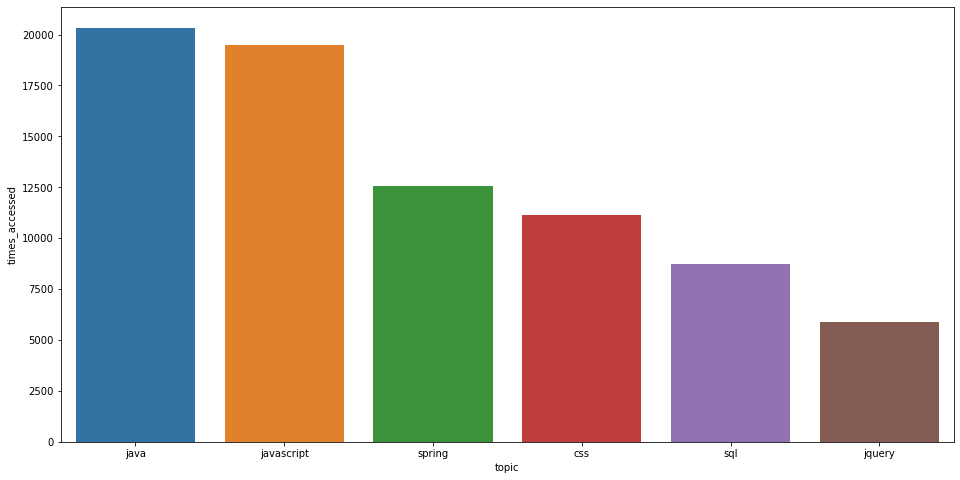

In [241]:
sns.barplot(data= wd_results_df, x = 'topic', y = 'times_accessed')